# Import Library

In [17]:
import pandas as pd  # Untuk membaca data dari file (misalnya CSV) dan memanipulasi DataFrame
import numpy as np   # Untuk melakukan operasi numerik, seperti membuat kolom biner berdasarkan kondisi
from sklearn.preprocessing import LabelEncoder # to encode data
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi data latih (train) dan data uji (test)
from sklearn.tree import DecisionTreeClassifier  # Untuk membangun model klasifikasi menggunakan pohon keputusan
from sklearn.tree import plot_tree  # Untuk menggambarkan (visualisasi) struktur pohon keputusan yang telah dibangun
from sklearn.preprocessing import LabelBinarizer  # Untuk mengubah label kategori (baik/buruk) menjadi format biner
import matplotlib.pyplot as plt  # Untuk membuat visualisasi, seperti menggambar kurva ROC dan pohon keputusan
import seaborn as sns

# Import Dataset

In [4]:
data = pd.read_csv('winequality-red(1).csv')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Data Cleaning and EDA

In [18]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [15]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html("sweetviz_report_wine_quality.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report_wine_quality.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


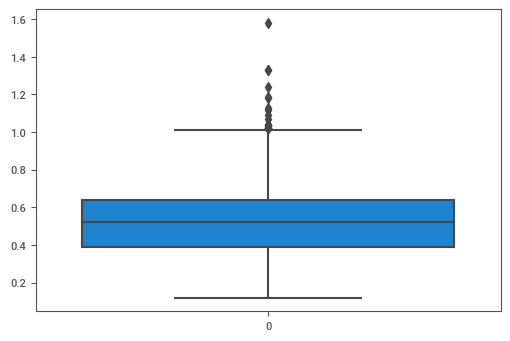

In [20]:
#sns.boxplot(data=data['fixed acidity'])
sns.boxplot(data=data['volatile acidity'])
plt.show()

In [21]:
#correlation testing
correlation_matrix = data.corr()
correlation_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Binarize Data

In [4]:
data['quality_label'] = np.where(data['quality']>=6,'good','bad')

In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad


# Data Manipulation

In [6]:
data = data.drop(columns=['quality']) #menghapus kolom quality untuk mencegah kebocoran data

In [7]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


# Encode data

In [8]:
label_encoder = LabelEncoder()
data['quality_label_encoded'] = label_encoder.fit_transform(data['quality_label'])

# Split Dataset into Train and Test

In [10]:
#memisahkan fitur dan label
x = data.drop(columns=['quality_label','quality_label_encoded'])
y = data['quality_label_encoded']

#membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

# Train Decission Tree Model

In [16]:
#membuat dan melatih model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

# Test the Model

In [12]:
#memprediksi dataset
# create dictionary for test data
test_data = {
    'fixed acidity': 11,
    'volatile acidity': 0.74,
    'citric acid': 0.58,        
    'residual sugar': 2.0,      
    'chlorides': 0.095,          
    'free sulfur dioxide': 25,  
    'total sulfur dioxide': 40,
    'density': 0.9956,           
    'pH': 3.2,                 
    'sulphates': 0.95,         
    'alcohol': 9.0           
}

# change the dictionary to dataframe for test data
X_test = pd.DataFrame([test_data])

# Predict quality based on test input
y_pred = model.predict(X_test)

# Decode the predicted label back to original categories
predicted_quality_label = label_encoder.inverse_transform(y_pred)

# Prediciton result
print(f'Prediction Result for wine quality: {predicted_quality_label[0]}')

Prediction Result for wine quality: good


# Visualization of Decission Tree

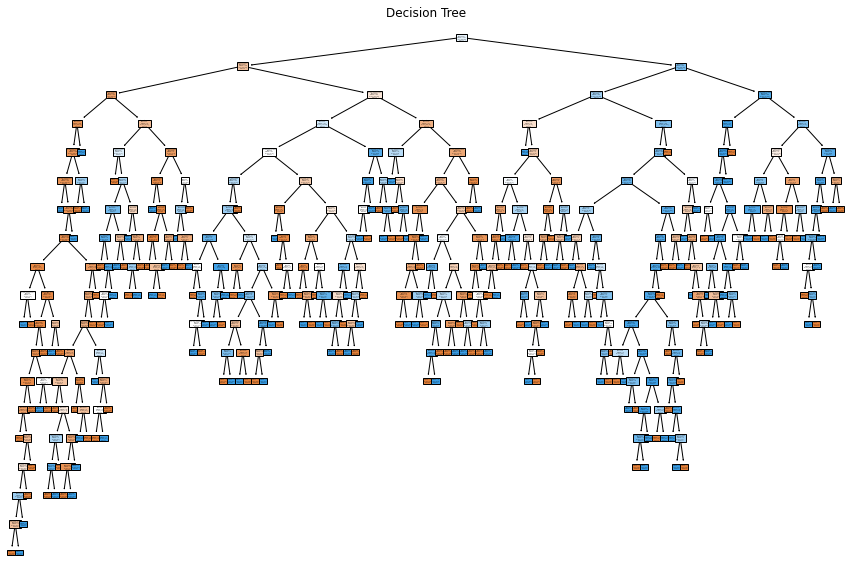

In [19]:
plt.figure(figsize=(15,10))
plot_tree(model, 
           filled=True, 
           feature_names=x.columns, 
           class_names=model.classes_.astype(str))  # Pastikan class_names adalah string
plt.title('Decision Tree')
plt.show()

# Evaluate Accuracy

In [20]:
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_pred, model.predict(X_test))

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

Training Accuracy: 1.00
Testing Accuracy: 1.00
